In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
%matplotlib inline

In [10]:
df = pd.read_csv('train.csv', encoding = 'iso-8859-1')
df1 = pd.read_csv('test.csv', encoding = 'iso-8859-1')

In [11]:
df.head(n=2)

,title,data
0,__label__18-24,1917715178553519 866004230174021 5677300099090...
1,__label__55+,1549131271824144 544900528944370 1003942339965...


In [12]:
df1.head(n=2)

,data
0,1516066978617491 203034046973744 1790864221223...
1,1802796346689443 1500653306612601 103169509694...


<Figure size 864x720 with 0 Axes>

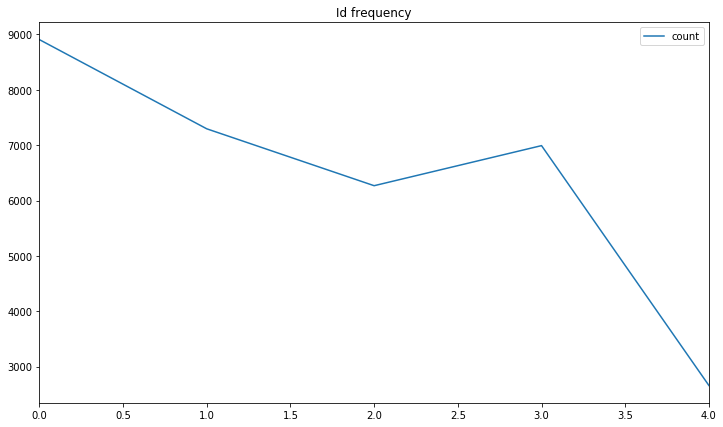

In [13]:
group_id = df.groupby("title", sort = 'count').size().reset_index(name = 'count')
fig = plt.figure(figsize=(12,10))
group_id.plot(figsize=(12,7), title = 'Id frequency')

In [17]:
y_data, X_data = df['title'], df['data']
X_test = df1['data']

In [18]:
print(len(X_data))

32122


In [19]:
print(len(X_test))


13768


see detail: https://www.kaggle.com/roccoli/multi-label-classification-with-sklearn

Creating tf-idf feature
* encode labels
* compute tf-idf from questions

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [21]:
X_data_count = count_vect.transform(X_data)
X_test_count = count_vect.transform(X_test)

In [22]:
# word level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=60000)
tfidf_vect.fit(X_data) # learn vocabulary and idf from training set
X_data_tfidf =  tfidf_vect.transform(X_data)
# assume that we don't have test set before
X_test_tfidf =  tfidf_vect.transform(X_test)

In [23]:
X_data_tfidf[0].shape

(1, 60000)

In [24]:
X_data_count.shape

(32122, 331518)

In [25]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_data_tfidf)


X_data_tfidf_svd = svd.transform(X_data_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

In [26]:
X_data_tfidf_svd.shape

(32122, 300)

In [28]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_data_n = encoder.fit_transform(y_data)


In [29]:
encoder.classes_

array(['__label__18-24', '__label__25-34', '__label__35-44',
       '__label__45-54', '__label__55+'], dtype=object)

In [30]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
def train_model(classifier, X_train, y_train, X_test, is_neuralnet=False, n_epochs=3):           
    if is_neuralnet:
        classifier.fit(X_train, y_train, epochs=n_epochs, batch_size=512)
        test_predictions = classifier.predict(X_test)
        test_predictions = test_predictions.argmax(axis=-1)
    else:
        classifier.fit(X_train, y_train)
        train_predictions = classifier.predict(X_train)
        test_predictions = classifier.predict(X_test)
        
    print("Training accuracy: ", accuracy_score(train_predictions, y_train))    

    return test_predictions

In [31]:
a = train_model(MultinomialNB(), X_data_tfidf, y_data, X_test_tfidf, is_neuralnet=False)

Training accuracy:  0.7417346366975904


In [34]:
len(a)

13768

In [37]:
import csv

for line in a: 
    with open('agedetector_team01_solution1.result.txt', 'w') as out_file:
        writer = csv.writer(line)
        writer.writerows(lines)

TypeError: argument 1 must have a "write" method

In [40]:
# file1 = open("agedetector_team01_solution1.result.txt","w") 
file = "./agedetector_team01_solution1.result.txt"
with open(file, 'w') as f:
    for data in a:
        f.writelines(data + "\n")